In [1]:
!unzip /content/drive/MyDrive/Colab\ Notebooks/Projects/TensorFlow/Todo/CNN/Mask-Detection-V3/archive.zip

Archive:  /content/drive/MyDrive/Colab Notebooks/Projects/TensorFlow/Todo/CNN/Mask-Detection-V3/archive.zip
replace mask_detection/no/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [2]:
!nvidia-smi

Tue Mar 30 14:14:05 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import pandas as pd

In [4]:
import tensorflow as tf

In [5]:
import os

In [6]:
class_names = os.listdir('/content/mask_detection')

In [7]:
class_names

['no', 'yes']

In [8]:
import random

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

How many imgs ? - 1
yes
596.jpg


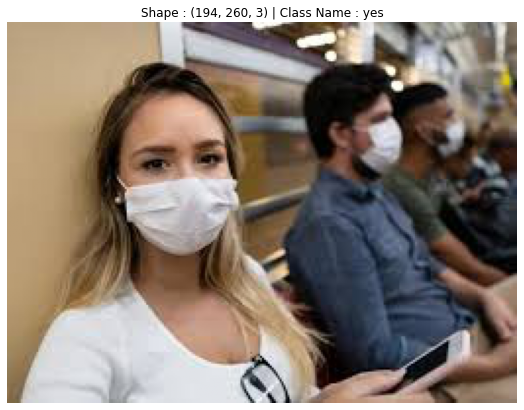

In [10]:
how_many_imgs = int(input('How many imgs ? - '))
for _ in range(how_many_imgs):
  type_of_class = random.choice(os.listdir(f'/content/mask_detection'))
  print(type_of_class)
  file_name = random.choice(os.listdir(f'/content/mask_detection/{type_of_class}/'))
  print(file_name)
  img = mpimg.imread(f'/content/mask_detection/{type_of_class}/{file_name}')
  img = img / 255.0
  plt.figure(figsize=(10,7))
  plt.imshow(img)
  plt.axis(False)
  plt.title(f'Shape : {img.shape} | Class Name : {type_of_class}')
  plt.show();

In [11]:
len(os.listdir('/content/mask_detection/no'))

1200

In [12]:
len(os.listdir('/content/mask_detection/yes'))

1188

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
datagen = ImageDataGenerator(rescale=1/255.0,rotation_range=0.25,width_shift_range=0.25,height_shift_range=0.25,shear_range=0.25,zoom_range=0.25,horizontal_flip=True,vertical_flip=True,validation_split=0.75)
train_data = datagen.flow_from_directory('/content/mask_detection',target_size=(224,224),class_mode='binary',subset='training')
test_data = datagen.flow_from_directory('/content/mask_detection',target_size=(224,224),class_mode='binary',subset='validation')

Found 597 images belonging to 2 classes.
Found 1791 images belonging to 2 classes.


# Modelling

In [15]:
!pip3 install wandb
import wandb
from wandb.keras import *

In [16]:
models_to_try = [
    # ['efficentnetb2','https://tfhub.dev/tensorflow/efficientnet/b2/feature-vector/1'],
    # ['efficentnetb7','https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1'],
    # ['efficentnetb5','https://tfhub.dev/tensorflow/efficientnet/b5/feature-vector/1'],
    # ['efficentnetb0','https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1'],
    # ['efficentnetb4','https://tfhub.dev/tensorflow/efficientnet/b4/feature-vector/1'],
    # ['efficentnetb3','https://tfhub.dev/tensorflow/efficientnet/b3/feature-vector/1'],
    # ['efficentnetb1','https://tfhub.dev/tensorflow/efficientnet/b1/feature-vector/1'],
    # ['efficentnetb6','https://tfhub.dev/tensorflow/efficientnet/b6/feature-vector/1'],
    # ['resnet50','https://tfhub.dev/tensorflow/resnet_50/feature_vector/1'],
    # ['resnet_v2_152','https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/4'],
    # ['resnet_v1_152','https://tfhub.dev/google/imagenet/resnet_v1_152/feature_vector/4'],
    # ['resnet_v1_50','https://tfhub.dev/google/imagenet/resnet_v1_50/feature_vector/4'],
    # ['resnet_v1_101','https://tfhub.dev/google/imagenet/resnet_v1_101/feature_vector/4'],
    # ['amiebanet_a_n18_f448','https://tfhub.dev/google/imagenet/amoebanet_a_n18_f448/feature_vector/1'],
    # ['inception_resnet_v2','https://tfhub.dev/google/imagenet/inception_resnet_v2/feature_vector/4'],
    # ['inception_v1','https://tfhub.dev/google/imagenet/inception_v1/feature_vector/4'],
    # ['inception_v3','https://tfhub.dev/google/imagenet/inception_v3/feature_vector/4'],
    # ['nasnet_large','https://tfhub.dev/google/imagenet/nasnet_large/feature_vector/4'],
    # ['nasnet_mobile','https://tfhub.dev/google/imagenet/nasnet_mobile/feature_vector/4'],
    # ['mobilenet_v2','https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'],
    # ['mobilenet_v3_large_100_224','https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5'],
    # ['mobilenet_v2_100_224','https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4'],
    # ['mobilenet_v2_140_224','https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4'],
    # ['mobilenet_v1_100_224','https://tfhub.dev/google/imagenet/mobilenet_v1_100_224/feature_vector/4'],
    # ['mobilenet_v3_small_100_224','https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/feature_vector/5'],
    # ['pnasnet_large','https://tfhub.dev/google/imagenet/pnasnet_large/feature_vector/4'],
    # ['cond-biggan','https://tfhub.dev/vtab/cond-biggan/1'],
    # ['uncond-biggan','https://tfhub.dev/vtab/uncond-biggan/1'],
    # ['bit/m-r50x3','https://tfhub.dev/google/bit/m-r50x3/1'],
    # ['bit/s-r50x3','https://tfhub.dev/google/bit/s-r50x3/1'],
    # ['bit/m-r101x1','https://tfhub.dev/google/bit/m-r101x1/1'],
    # ['pnasnet_large','https://tfhub.dev/google/imagenet/pnasnet_large/feature_vector/4'],
    # ['bit/m-r101x3','https://tfhub.dev/google/bit/m-r101x3/1'],
    # ['bit/s-r101x3','https://tfhub.dev/google/bit/s-r101x3/1'],
    # ['bit/s-r152x4','https://tfhub.dev/google/bit/s-r152x4/1'],
    # ['bit/s-r101x1','https://tfhub.dev/google/bit/s-r101x1/1'],
]

In [17]:
import tensorflow_hub as hub

In [18]:
# activations = ['relu','sigmoid','tanh','selu','elu']
# for activation in activations:
#   wandb.init(project="Mask-Detection-V3",name=f"{models_to_try[0][0]}-{activation}-at")
#   model = tf.keras.Sequential([
#     hub.KerasLayer(models_to_try[0][1],input_shape=(224,224,3)),
#     tf.keras.layers.Dense(1,activation=activation)
#   ])
#   model.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
#   model.fit(train_data,validation_data=(test_data),epochs=5,callbacks=[WandbCallback()])

In [19]:
# for model_to_try in models_to_try:
#   try:
#     print('-'*100)
#     print(model_to_try)
#     print('-'*100)
#     wandb.init(project="Mask-Detection-V3",name=f"{model_to_try[0]}-tl")
#     model = tf.keras.Sequential([
#       hub.KerasLayer(model_to_try[1],input_shape=(224,224,3)),
#       tf.keras.layers.Dense(1,activation='sigmoid')
#     ])
#     model.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
#     model.fit(train_data,validation_data=(test_data),epochs=5,callbacks=[WandbCallback()])
#   except:
#     print('*-*'*100)
#     print(model_to_try)
#     print('*-*'*100)
#     print('It didnt work')

In [20]:
!nvidia-smi

Tue Mar 30 14:14:33 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Results

`val_loss` best = bit/m-r50x3

`val_accuracy` best = bit/m-r50x3

`accuracy` best = bit/m-r50x3

`loss` best = bit/m-r50x3

In [21]:
datagen = ImageDataGenerator(rescale=1/255.0,rotation_range=0.25,width_shift_range=0.25,height_shift_range=0.25,shear_range=0.25,zoom_range=0.25,horizontal_flip=True,vertical_flip=True,validation_split=0.25)
train_data = datagen.flow_from_directory('/content/mask_detection',target_size=(224,224),class_mode='binary',subset='training')
test_data = datagen.flow_from_directory('/content/mask_detection',target_size=(224,224),class_mode='binary',subset='validation')

Found 1791 images belonging to 2 classes.
Found 597 images belonging to 2 classes.


In [32]:
wandb.init(project="Mask-Detection-V3",name=f"big-dog-2")
model = tf.keras.Sequential([
  hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5",input_shape=(224,224,3)),
  tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
model.fit(train_data,validation_data=(test_data),epochs=7,callbacks=[WandbCallback(),tf.keras.callbacks.EarlyStopping(patience=5)])
model.save('/content/drive/MyDrive/Colab Notebooks/Projects/TensorFlow/Todo/CNN/Mask-Detection-V3/model.h5')

epoch,6
loss,0.07347
accuracy,0.9732
val_loss,0.15344
val_accuracy,0.9531
_runtime,1189
_timestamp,1617114866
_step,6
best_val_loss,0.1114
best_epoch,5


epoch,▁▂▃▅▆▇█
loss,█▄▂▂▁▁▂
accuracy,▁▆▇████
val_loss,▄▇▃▂█▁▃
val_accuracy,▄▁▆▇▃█▇
_runtime,▁▂▂▃▄▆█
_timestamp,▁▂▂▃▄▆█
_step,▁▂▃▅▆▇█


Epoch 1/7
56/56 [==============================] - 50s 782ms/step - loss: 0.5909 - accuracy: 0.6730 - val_loss: 0.3353 - val_accuracy: 0.8727
Epoch 2/7
56/56 [==============================] - 41s 733ms/step - loss: 0.2806 - accuracy: 0.8952 - val_loss: 0.2845 - val_accuracy: 0.8861
Epoch 3/7
56/56 [==============================] - 41s 728ms/step - loss: 0.2128 - accuracy: 0.9235 - val_loss: 0.2306 - val_accuracy: 0.9062
Epoch 4/7
56/56 [==============================] - 41s 732ms/step - loss: 0.1889 - accuracy: 0.9385 - val_loss: 0.2110 - val_accuracy: 0.9213
Epoch 5/7
56/56 [==============================] - 41s 725ms/step - loss: 0.1761 - accuracy: 0.9375 - val_loss: 0.2142 - val_accuracy: 0.9162
Epoch 6/7
56/56 [==============================] - 40s 726ms/step - loss: 0.1573 - accuracy: 0.9372 - val_loss: 0.2072 - val_accuracy: 0.9146
Epoch 7/7
56/56 [==============================] - 41s 730ms/step - loss: 0.1433 - accuracy: 0.9480 - val_loss: 0.2055 - val_accuracy: 0.9196


In [33]:
import matplotlib.pyplot as plt

In [34]:
test_imgs = os.listdir('/content/test')
# test_imgs.remove('.ipynb_checkpoints')

In [35]:
!pip3 install tensorflow

In [37]:
model_ = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Projects/TensorFlow/Todo/CNN/Mask-Detection-V3/model.h5',custom_objects={'KerasLayer':hub.KerasLayer})

In [65]:
class_names

['no', 'yes']

In [70]:
# for test_img in test_imgs:
#   img = image.load_img(f"/content/test/{test_img}", target_size=(224, 224))
#   img = image.img_to_array(img)
#   img = img / 255.0
#   preds = model.predict(np.expand_dims(img, axis=0))
#   print(preds)
#   plt.figure(figsize=(10,7))
#   plt.imshow(img)
#   # plt.title(f'{class_names[tf.round(preds)]}')
#   plt.title(f'{class_names[int(np.squeeze(tf.round(preds)))]}')
#   plt.axis(False)
#   plt.show();